In [1]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).""")

This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, A universal black-box quantum Monte Carlo approach to quantum phase transitions, arXiv:2408.03924v2 (2025).


In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [3]:
fname = "../data/prb_fig3_tfim_data.csv"
cols = ["beta", "Hdiag_value", "Hdiag_std", "Hoffdiag_value", "Hoffdiag_std", "Hdiag_Eint_value", "Hdiag_Eint_std", "Hdiag_Fint_value", "Hdiag_Fint_std", "Hoffdiag_Eint_value", "Hoffdiag_Eint_std", "Hoffdiag_Fint_value", "Hoffdiag_Fint_std", "mc_steps", "avg_q", "max_q", "avg_sgn", "sgn_std", "tot_cpu_time (s)", "wall_time (s)", "Tsteps", "steps", "Hdiag_test", "Hoffdiag_test", "Hdiag_Eint_test", "Hdiag_Fint_test", "Hoffdiag_Eint_test", "Hoffdiag_Fint_test", "diag_ES_value", "diag_ES_std", "diag_FS_value", "diag_FS_std", "offdiag_ES_value", "offdiag_ES_std", "offdiag_FS_value", "offdiag_FS_std"]
df = pd.read_csv(fname, names=cols, skiprows=1)
# add diag fidsus columns
df['diag_FS_value'] = df['diag_FS_value'] / 16
df['diag_FS_std'] = 2 * df['diag_FS_std'] / 16
# add diag ES columns
df['diag_ES_value'] = df['diag_ES_value'] / 16
df['diag_ES_std'] = 2 * df['diag_ES_std'] / 16
# add offdiag fidsus columns
df['offdiag_FS_value'] = df['offdiag_FS_value'] / 16
df['offdiag_FS_std'] = 2 * df['offdiag_FS_std'] / 16
# add offdiag ES columns
df['offdiag_ES_value'] = df['offdiag_ES_value'] / 16
df['offdiag_ES_std'] = 2 * df['offdiag_ES_std'] / 16

zero_T_gs_fs = 0.01729106903076172
zero_T_gs_es = 0.258185593349225
df.head()

,beta,Hdiag_value,Hdiag_std,Hoffdiag_value,Hoffdiag_std,Hdiag_Eint_value,Hdiag_Eint_std,Hdiag_Fint_value,Hdiag_Fint_std,Hoffdiag_Eint_value,...,Hoffdiag_Eint_test,Hoffdiag_Fint_test,diag_ES_value,diag_ES_std,diag_FS_value,diag_FS_std,offdiag_ES_value,offdiag_ES_std,offdiag_FS_value,offdiag_FS_std
0,0.165517,-2.524748,0.003866,-5.632232,0.012783,3.531042,0.004559,0.072543,0.000094,11.890329,...,True,True,0.154749,0.000448,0.003170,0.000009,0.414987,0.005098,0.008554,0.000105
1,0.100000,-1.577624,0.003935,-3.267830,0.010055,1.811811,0.002475,0.022579,0.000031,4.497132,...,True,True,0.097683,0.000274,0.001217,0.000003,0.214329,0.002913,0.002675,0.000036
2,0.231034,-3.345832,0.003789,-8.565815,0.017970,5.840494,0.006533,0.166599,0.000189,29.343508,...,True,True,0.203385,0.000565,0.005744,0.000017,0.774486,0.010365,0.022237,0.000299
3,0.296552,-3.951960,0.003661,-12.360547,0.021065,8.481018,0.009331,0.308382,0.000343,66.608840,...,True,True,0.240592,0.000743,0.008543,0.000027,1.331296,0.013416,0.048975,0.000496
4,0.362069,-4.288328,0.003878,-17.059880,0.027836,10.875958,0.012461,0.477889,0.000566,135.871485,...,True,True,0.263600,0.000844,0.011034,0.000038,1.905945,0.013153,0.085364,0.000594


## Fidelity susceptibility plot

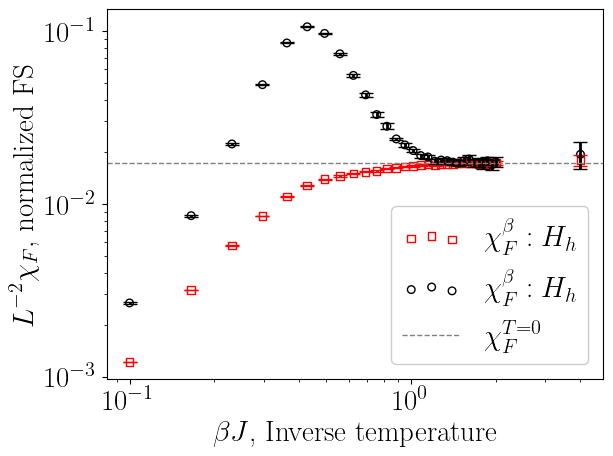

In [4]:
size = 30
plt.scatter(x=df["beta"], y = df["diag_FS_value"], marker='s', s=size, facecolors='none', edgecolors='red', label=r"$\chi_F^{\beta}: H_h$")
plt.errorbar(x=df["beta"], y = df["diag_FS_value"], yerr=df["diag_FS_std"], fmt='None', color='red', markeredgecolor='red', capsize=5, capthick=1)
plt.scatter(x=df["beta"], y = df["offdiag_FS_value"], s=size, facecolors='none', edgecolors='black', label=r"$\chi_F^{\beta}: H_h$")
plt.errorbar(x=df["beta"], y = df["offdiag_FS_value"], yerr=df["offdiag_FS_std"], fmt='None', color='black', capsize=5, capthick=1, markeredgecolor='black')
#plt.errorbar(x=df["beta"], y = df["offdiag_FS_value"], yerr=df["offdiag_FS_std"], fmt='x', markerfacecolor='none', alpha=0.3, label=r"$H_J$ driver")
plt.axhline(y=zero_T_gs_fs, color='gray', linestyle='--', linewidth=1, label=r"$\chi_F^{T = 0}$")
plt.legend()
plt.xscale("log")
plt.yscale("log")
#lineplot.set_xlim(0.08, 1.2)
plt.xticks([0.1, 1])
plt.xlabel(r"$\beta J$, Inverse temperature")
plt.ylabel(r"$L^{-2} \chi_F$, normalized FS")
plt.savefig("figures/prb_fig3_fidsus.pdf", dpi=800, bbox_inches="tight")

## Energy susceptibility plot

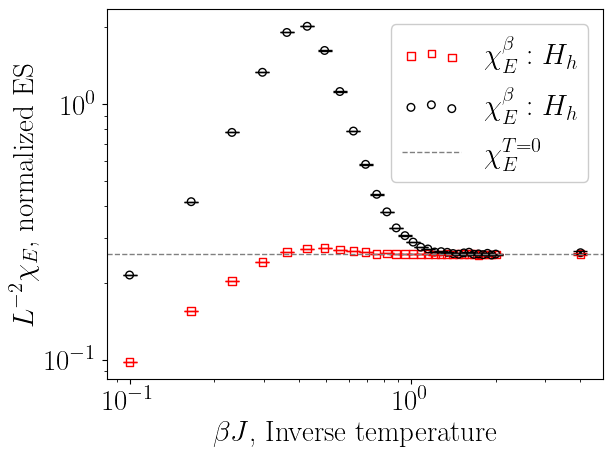

In [5]:
size = 30
plt.scatter(x=df["beta"], y = df["diag_ES_value"], marker='s', s=size, facecolors='none', edgecolors='red', label=r"$\chi_E^{\beta}: H_h$")
plt.errorbar(x=df["beta"], y = df["diag_ES_value"], yerr=df["diag_FS_std"], fmt='None', color='red', markeredgecolor='blue', capsize=5, capthick=1)
plt.scatter(x=df["beta"], y = df["offdiag_ES_value"], s=size, facecolors='none', edgecolors='black', label=r"$\chi_E^{\beta}: H_h$")
plt.errorbar(x=df["beta"], y = df["offdiag_ES_value"], yerr=df["offdiag_FS_std"], fmt='None', color='black', capsize=5, capthick=1, markeredgecolor='orange')
plt.axhline(y=zero_T_gs_es, color='gray', linestyle='--', linewidth=1, label=r"$\chi_E^{T = 0}$")
plt.legend()
plt.xscale("log")
plt.yscale("log")
#lineplot.set_xlim(0.08, 1.2)
plt.xticks([0.1, 1])
plt.xlabel(r"$\beta J$, Inverse temperature")
plt.ylabel(r"$L^{-2} \chi_E$, normalized ES")
plt.savefig("figures/prb_fig3_esus.pdf", dpi=800, bbox_inches="tight")